In [1]:
import pandas as pd
import plotly.express as px
from IPython.display import Markdown

from tb_incubator.constants import set_project_base_path, image_path
from tb_incubator.constants import compartments, latent_compartments, infectious_compartments, model_times, age_strata, indicator_names
from tb_incubator.model import build_model
from tb_incubator.utils import load_param_info, get_param_table
from tb_incubator.plotting import set_plot_label, display_plot

pd.options.plotting.backend = "plotly"  
project_paths = set_project_base_path("../tb_incubator/")


## Model construction

In [2]:
param_info = load_param_info()
params = param_info["value"]

In [3]:
model, desc = build_model(
    compartments,
    latent_compartments,
    infectious_compartments,
    age_strata,
    params,
    model_times
)
Markdown(desc)

We used the [summer framework](https://summer2.readthedocs.io/en/latest/) to construct a compartmental model of tuberculosis (TB) dynamics. The base model consists of 5 compartments: susceptible, early latent, late latent, infectious, recovered--with flows added to represent the transitions and interactions between compartments. We stratified the model based on 5 age groups: 0-4, 5-14, 15-34, 35-49, 50-100. Age group-specific adjustments were applied for population death flows, latency flows, and infectiousness.

In [4]:
model.run(params)

## Parameters

In [5]:
fixed_param_table = get_param_table(param_info)
Markdown(fixed_param_table.to_markdown())

| Parameter                                                                   | Value                                               | Unit                        | Source                                                                                        |
|:----------------------------------------------------------------------------|:----------------------------------------------------|:----------------------------|:----------------------------------------------------------------------------------------------|
| Start population size                                                       | 1.0                                                 | person                      | A value to avoid dividing by zero in the force of infection calculation                       |
| Age infectiousness switch                                                   | 15.0                                                | years old                   | Set based on duration of BCG protection [@ngupidop2016, @roy2019]                             |
| TB-specific death rate                                                      | 0.1                                                 | per year                    | United Nations Population Division data for Indonesia [@unwpp2024]                            |
| All-cause mortality rate                                                    | 1                                                   | per year                    | United Nations Population Division data for Indonesia [@unwpp2024]                            |
| Contact rate                                                                | 3                                                   | contacts per person per day | Arbitrary value selected from a parameter range published in a previous study [@ragonnet2022] |
| Self-recovery rate                                                          | 0.1                                                 | per year                    | Arbitrary value selected from a parameter range published in a previous study [@ragonnet2020] |
| Relative risk of reinfection while latently infected (ref. infection-naive) | 0.5                                                 |                             | Arbitrary value selected from a parameter range published in a previous study [@andrews2012]  |
| Relative risk of reinfection after recovery (ref. infection-naive)          | 0.2                                                 |                             | Arbitrary value selected from a parameter range published in a previous study [@andrews2012]  |
| Rate of rapid progression to active TB, based on age groups                 | 0: 2.4/5: 2.0/15: 0.1/35: 0.1/50: 0.1               | per year                    | Arbitrary value selected from a parameter range published in a previous study [@ragonnet2017] |
| Rate of late reactivation, based on age groups                              | 0: 7e-09/5: 0.0023/15: 0.0012/35: 0.0012/50: 0.0012 | per year                    | Arbitrary value selected from a parameter range published in a previous study [@ragonnet2017] |
| Rate of stabilization from early to late latency, based on age groups       | 0: 4.4/5: 4.4/15: 2.0/35: 2.0/50: 2.0               | per year                    | Arbitrary value selected from a parameter range published in a previous study [@ragonnet2017] |
| TB progression multiplier                                                   | 1.9                                                 |                             | Arbitrary value selected from a parameter range published in a previous study [@ragonnet2022] |
| Seed time                                                                   | 1850.0                                              |                             | Set based on an arbitrary value to model the epidemic                                         |
| Seed duration                                                               | 1.0                                                 | days                        | Set based on an arbitrary value to model the epidemic                                         |
| Seed rate                                                                   | 5.0                                                 | persons per day             | Set based on an arbitrary value to model the epidemic                                         |
| Case detection rate                                                         | 1.0                                                 | per year                    | Arbitrary value                                                                               |

## Results

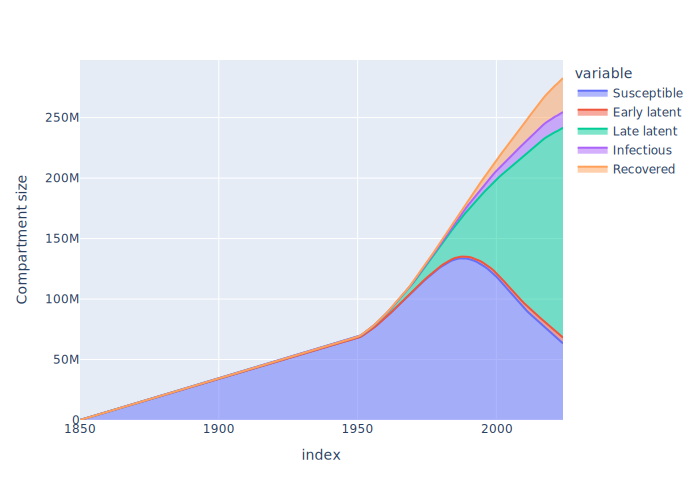

In [6]:
outs = model.get_derived_outputs_df()
fig = outs[[f"comp_size_{c}" for c in compartments]].plot.area()
set_plot_label(fig, indicator_names, "Compartment size")
display_plot(fig, "comp_size", "svg")

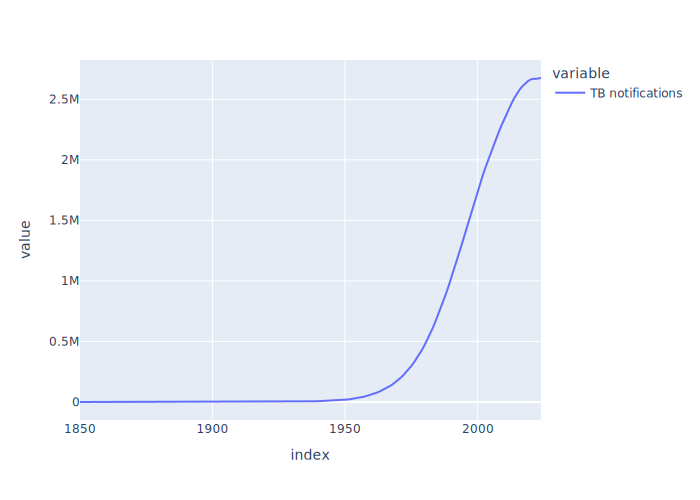

In [7]:
fig = outs[["notification"]].plot()
set_plot_label(fig, indicator_names, "value")
display_plot(fig, "notification", "svg")

In [8]:
outs["percentage_latent"].plot()

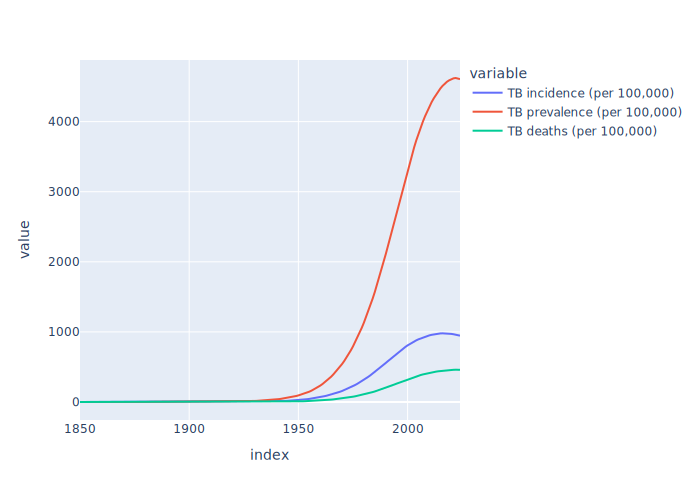

In [9]:
fig = outs[["incidence", "prevalence", "mortality"]].plot()
set_plot_label(fig, indicator_names, "value")
display_plot(fig, "inc_prev_mort", "svg")